Homework 4: Linear Regression

In [302]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

### Load data:

In [303]:
df = pd.read_csv('E:\Chula work\Year 4\Big Data\hw4_linear.csv')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [305]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [306]:
df.value_counts()

director_name      num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross       genres                                actor_1_name         movie_title           num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget      title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz           168.0                   87.0      0.0                      548.0                   Ewen Bremner         22000.0                 8579684.0   Comedy                                Peter Dinklage       Death at a FuneralÂ   89547            24324                      Kris Marshall    0.0                   end credits roll call|four word title|funeral|secret|uncle         http://www

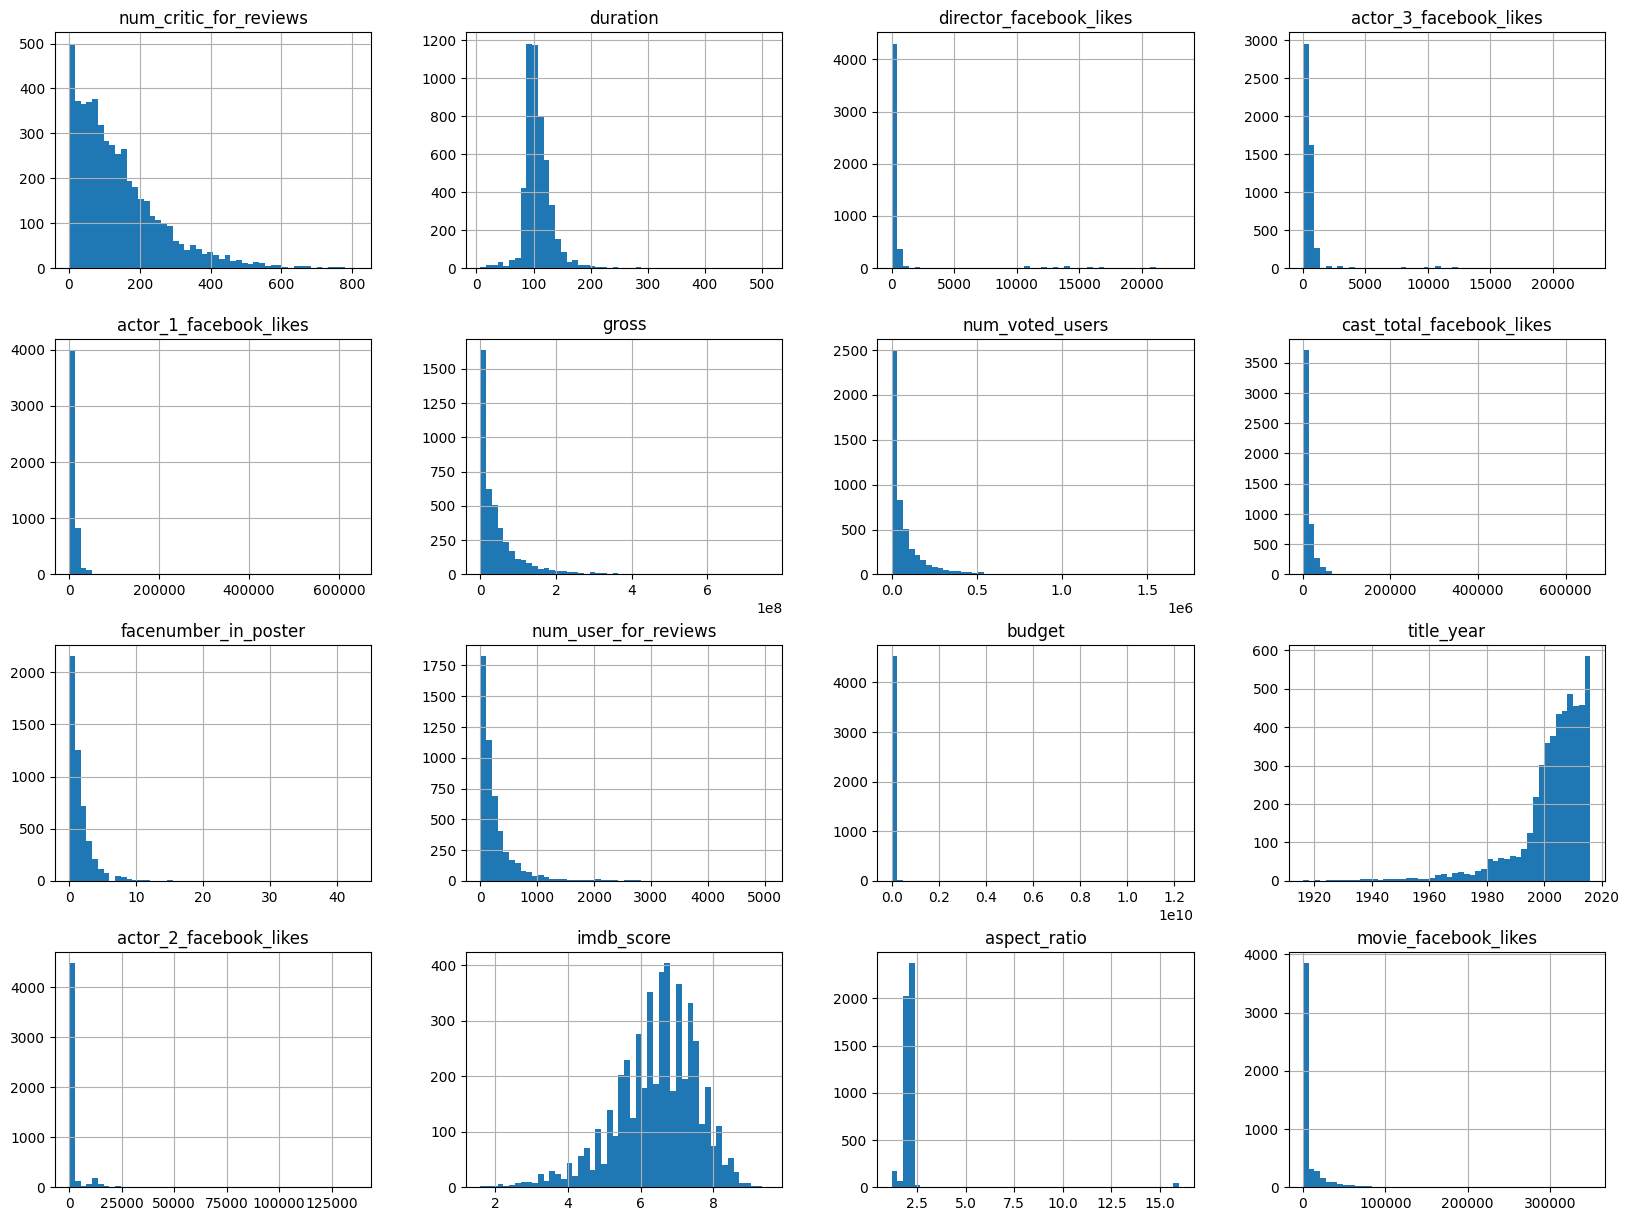

In [307]:
# Plot the data
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [308]:
# Check the missing values
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [309]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [310]:
# Select only numeric values
cols = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes',
        'actor_2_facebook_likes', 'actor_3_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
df1 = df[cols]
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,1000.0,936.0,855.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,7.9,1.78,33000
1,302.0,169.0,563.0,40000.0,5000.0,1000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,7.1,2.35,0
2,602.0,148.0,0.0,11000.0,393.0,161.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,6.8,2.35,85000
3,813.0,164.0,22000.0,27000.0,23000.0,23000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,8.5,2.35,164000
4,NaN,NaN,131.0,131.0,12.0,NaN,NaN,8,143,0.0,NaN,NaN,NaN,7.1,NaN,0


In [311]:
# Check for missing values
df1.isna().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### Clean the data

In [312]:
# Fill in the missing values with mean of the columns
df1 = df1.fillna(df1.mean().round(2))
df1 = df1.astype('int64')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,723,178,0,1000,936,855,760505847,886204,4834,0,3054,237000000,2009,7,1,33000
1,302,169,563,40000,5000,1000,309404152,471220,48350,0,1238,300000000,2007,7,2,0
2,602,148,0,11000,393,161,200074175,275868,11700,1,994,245000000,2015,6,2,85000
3,813,164,22000,27000,23000,23000,448130642,1144337,106759,0,2701,250000000,2012,8,2,164000
4,140,107,131,131,12,645,48468407,8,143,0,272,39752620,2002,7,2,0


In [313]:
# Check again if there is any missing value
df1.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### Preprocess Data:

In [314]:
df1.corr().round(3)

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000,0.255,0.179,0.190,0.282,0.271,0.442,0.624,0.263,-0.034,0.609,0.116,0.273,0.294,-0.031,0.683
duration,0.255,1.000,0.154,0.088,0.131,0.123,0.205,0.315,0.123,0.013,0.326,0.064,-0.118,0.255,-0.066,0.197
director_facebook_likes,0.179,0.154,1.000,0.091,0.119,0.120,0.139,0.296,0.119,-0.041,0.221,0.021,-0.064,0.160,0.003,0.161
actor_1_facebook_likes,0.190,0.088,0.091,1.000,0.390,0.250,0.141,0.193,0.951,0.072,0.145,0.022,0.087,0.073,-0.013,0.135
actor_2_facebook_likes,0.282,0.131,0.119,0.390,1.000,0.560,0.258,0.271,0.628,0.071,0.219,0.044,0.102,0.081,-0.003,0.243
actor_3_facebook_likes,0.271,0.123,0.120,0.250,0.560,1.000,0.304,0.287,0.474,0.099,0.230,0.047,0.096,0.053,-0.001,0.279
gross,0.442,0.205,0.139,0.141,0.258,0.304,1.000,0.615,0.229,-0.026,0.538,0.101,0.023,0.161,0.025,0.369
num_voted_users,0.624,0.315,0.296,0.193,0.271,0.287,0.615,1.000,0.266,-0.027,0.798,0.078,0.008,0.397,-0.006,0.538
cast_total_facebook_likes,0.263,0.123,0.119,0.951,0.628,0.474,0.229,0.266,1.000,0.092,0.207,0.036,0.110,0.083,-0.011,0.210
facenumber_in_poster,-0.034,0.013,-0.041,0.072,0.071,0.099,-0.026,-0.027,0.092,1.000,-0.069,-0.019,0.060,-0.070,0.015,0.009


In [315]:
# Select the columns that has strong correlation with Y (num_critic_for_reviews)
mycols = ['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes']
df1[mycols].corr()

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
num_critic_for_reviews,1.000000,0.623814,0.608515,0.682675
num_voted_users,0.623814,1.000000,0.797803,0.537924
num_user_for_reviews,0.608515,0.797803,1.000000,0.400472
movie_facebook_likes,0.682675,0.537924,0.400472,1.000000


In [316]:
# Select columns that has low correlations among Xs
mycols = ['num_critic_for_reviews', 'num_user_for_reviews', 'movie_facebook_likes']
df1[mycols].corr()

,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes
num_critic_for_reviews,1.000000,0.608515,0.682675
num_user_for_reviews,0.608515,1.000000,0.400472
movie_facebook_likes,0.682675,0.400472,1.000000


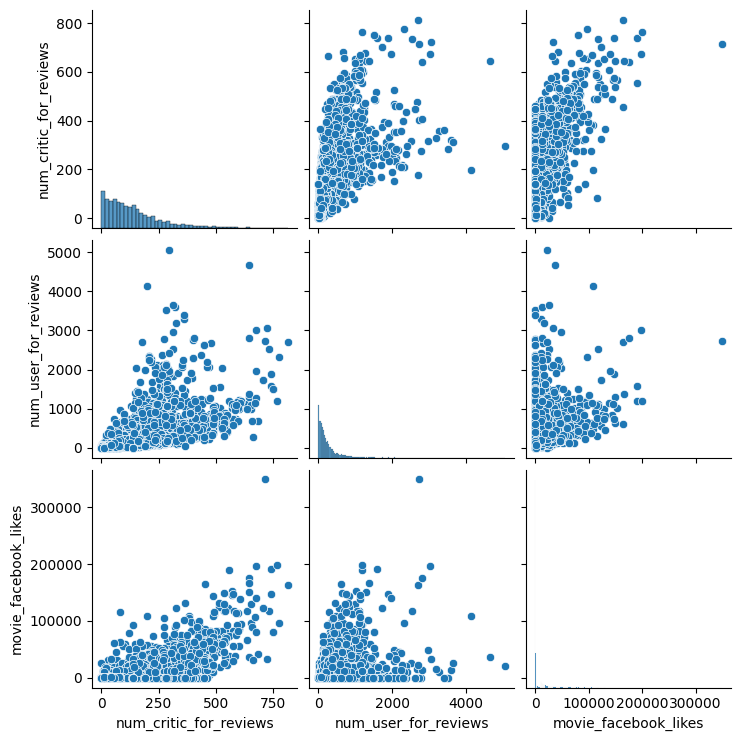

In [317]:
# Check with plots
sns.pairplot(df1[mycols])

In [318]:
# Split train-test
train,test = train_test_split(df1, test_size=0.3, random_state=99, shuffle=True)

In [319]:
train[mycols].corr()

,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes
num_critic_for_reviews,1.000000,0.600374,0.693537
num_user_for_reviews,0.600374,1.000000,0.395003
movie_facebook_likes,0.693537,0.395003,1.000000


### Train:

In [320]:
# Train the model
x_train = train.drop('num_critic_for_reviews', axis=1)
y_train = train['num_critic_for_reviews']
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [321]:
# Make a prediction
y_train_pred = model.predict(x_train)
print('r2_score:', r2_score(y_train, y_train_pred))

r2_score: 0.658189944268198


### Test:

In [322]:
x_test = test.drop('num_critic_for_reviews', axis=1)
y_test = test['num_critic_for_reviews']

In [323]:
y_test_pred = model.predict(x_test)

### Evaluate the Result

Text(0, 0.5, 'y_test_pred')

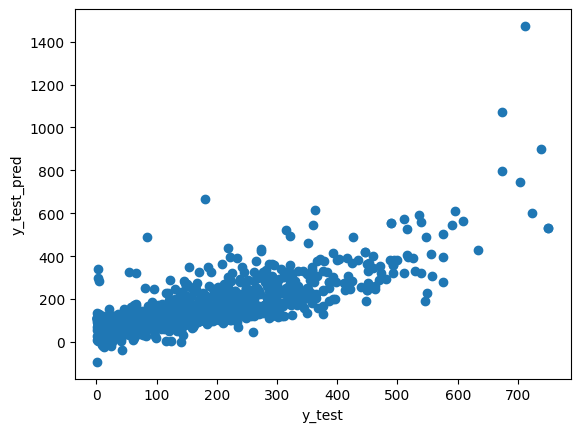

In [324]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [325]:
print('r2_score:', r2_score(y_test, y_test_pred))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(y_test,y_test_pred))
print('mean_squared_error:', mean_squared_error(y_test,y_test_pred))

r2_score: 0.6145141308523273
mean_absolute_percentage_error: 2.5227995828897107
mean_squared_error: 5963.724082328862


### Cross Validation

In [326]:
from sklearn.model_selection import cross_val_score
x = df1.drop('num_critic_for_reviews', axis=1)
y = df1['num_critic_for_reviews']

In [327]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3)
scores = cross_val_score(model, x, y, cv=cv, scoring='r2')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.64 accuracy with a standard deviation of 0.01
